## Github issues analysis
#### This analysis includes open and closed issues:
- issues duration
- comments amount/ issue
- issues labels
- author organizations
- keywords frequencies

In [1]:
import json
import requests
import numpy as np
import pandas as pd
import os
import time
from pprint import pprint
from requests.auth import HTTPBasicAuth
from datetime import datetime
from datetime import timezone
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### useful data analysis websites

In [2]:
# https://app.flipsidecrypto.com/auth/signup?camplink=homepage
# https://www.cryptomiso.com/#ATOM

### helper functions

In [3]:
# helper functions
def next_page(link):
    links = link.split(',')
    for link in links:
    # If there is a 'next' link return the URL between the angle brackets, or None
        if 'rel="next"' in link:
            return link[link.find("<")+1:link.find(">")]
    return None

def label_name(labels):
    label_names = []
    for label in labels:
        label_names.append(label['name'])
    return label_names

def find_keywords(content, words, words_dict):
    
    for word in words:
        if word in content:
            words_dict[word] += 1
                      
def cross_link_issues(content):
    if content == None:
        return 0
    return content.count('closes:')

def title_concat_body(title, body):
    if title == None:
        title =''
    if body == None:
        body = ''
    return title + body

### prepare the df for open and closed issues

In [4]:
# prepare open issue df
issues_df = pd.DataFrame(columns = ["issue_no",
                                    "created_at", 
                                    "closed_at", 
                                    "assignees_no", 
                                    "labels",
                                    "closes_no",
                                    "comments",
                                    "content",
                                    "author_association"])

# prepare close issue df
closed_issues_df = pd.DataFrame(columns = ["issue_no",
                                    "created_at", 
                                    "closed_at", 
                                    "assignees_no", 
                                    "labels",
                                    "closes_no",
                                    "comments",
                                    "content",
                                    "author_association"])


### setup github token to get a higher threshhold for reqeust rate limit

In [5]:
token = ''
headers = {'Authorization': f'token {token}'}

### get open issues

In [47]:
url = "https://api.github.com/repos/cosmos/gaia/issues"
while url != None:
    r = requests.get(url, headers=headers).json()
  
    for i in range(len(r)):    
        data = {
                 "issue_no": r[i]["number"],
                 "created_at": r[i]["created_at"], 
                 "closed_at": r[i]["closed_at"],
                 "assignees_no": len(r[i]["assignees"]),
                 "labels": label_name(r[i]['labels']),
                 "closes_no": cross_link_issues(r[i]['body']),
                 "comments_no": r[i]['comments'],
                 "content":  title_concat_body(r[i]['title'], r[i]['body']),
                 "author_association":r[i]['author_association'],
                }
    
        issues_df = issues_df.append(data, ignore_index=True)
   
    link = requests.get(url,headers=headers).headers.get('link', None)
    url = next_page(link)
    
issues_df.head()

,issue_no,created_at,closed_at,assignees_no,labels,closes_no,comments,content,author_association,comments_no
0,1084,2021-11-28 12:37:16+00:00,None,1,"[T:bug, blocked]",0,NaN,Replacing Cosmos SDK with 43.2Is there a reaso...,CONTRIBUTOR,0.0
1,1081,2021-11-25 09:02:37+00:00,None,2,[more-info-needed],0,NaN,Upgrade to Gaia V6.0.0 startup error4:00PM INF...,NONE,0.0
2,1073,2021-11-18 23:41:57+00:00,None,2,[move-to-sdk],0,NaN,"Output of 'status' command returned on stderr,...",NONE,0.0
3,1072,2021-11-18 23:32:49+00:00,None,0,[],0,NaN,Docker container doesn't show the version## Su...,NONE,0.0
4,1067,2021-11-16 15:06:23+00:00,None,0,[governance],0,NaN,Archive IPFS links in old governance proposals...,MEMBER,0.0


### get close issues

In [7]:
closed_url = "https://api.github.com/repos/cosmos/gaia/issues?state=closed"
while closed_url != None:
    time.sleep(2)
    r = requests.get(closed_url, headers=headers).json()
    for i in range(len(r)):    
        data = {
                 "issue_no": r[i]["number"],
                 "created_at": r[i]["created_at"], 
                 "closed_at": r[i]["closed_at"],
                 "assignees_no": len(r[i]["assignees"]),
                 "labels": label_name(r[i]['labels']),
                 "closes_no": cross_link_issues(r[i]['body']),
                 "comments_no": r[i]['comments'],
                 "content": title_concat_body(r[i]['title'], r[i]['body']),
                 "author_association":r[i]['author_association'],
                }
    
        closed_issues_df = closed_issues_df.append(data, ignore_index=True)
        
    link = requests.get(closed_url, headers=headers).headers.get('link', None)
    closed_url = next_page(link)
closed_issues_df.head()

,issue_no,created_at,closed_at,assignees_no,labels,closes_no,comments,content,author_association,comments_no
0,1083,2021-11-28T11:30:52Z,2021-11-29T12:05:42Z,0,[],0,NaN,Update Readme# README.MD PREVIEW\r\n\r\n\r\n<d...,MEMBER,2.0
1,1082,2021-11-26T03:33:05Z,2021-11-26T11:35:13Z,0,[good first issue],0,NaN,Upgrade to v6.0.0 errorMy current version is v...,NONE,3.0
2,1080,2021-11-24T10:55:04Z,2021-11-29T08:58:41Z,0,[],0,NaN,Update upgrade-node.mdadd more info\r\n\r\n<!-...,MEMBER,0.0
3,1079,2021-11-24T09:16:35Z,2021-11-24T10:15:09Z,0,[],0,NaN,Rc0/v6.0.0<!-- < < < < < < < < < < < < < < < <...,MEMBER,1.0
4,1078,2021-11-24T08:54:25Z,2021-11-24T09:12:53Z,0,[],0,NaN,gaia: add NewSetUpContextDecorator to antedeco...,MEMBER,2.0


### clean data

In [8]:
# drop duplicated rows
issues_df = issues_df.drop_duplicates(subset='issue_no', keep="first")
closed_issues_df = closed_issues_df.drop_duplicates(subset='issue_no', keep="first")
# time formating for issue open and closed time
issues_df['created_at'] = pd.to_datetime(issues_df['created_at'],utc=True)
closed_issues_df['closed_at'] = pd.to_datetime(closed_issues_df['closed_at'])
closed_issues_df['created_at'] = pd.to_datetime(closed_issues_df['created_at'],utc=True)

In [9]:
issues_df.info()
closed_issues_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   issue_no            99 non-null     object             
 1   created_at          99 non-null     datetime64[ns, UTC]
 2   closed_at           0 non-null      object             
 3   assignees_no        99 non-null     object             
 4   labels              99 non-null     object             
 5   closes_no           99 non-null     object             
 6   comments            0 non-null      object             
 7   content             99 non-null     object             
 8   author_association  99 non-null     object             
 9   comments_no         99 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 8.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 962
Data columns (tot

In [10]:
issues_df.to_csv('./open.csv')
closed_issues_df.to_csv('./close.csv')
print('There are {} open issues + open pull requests!'.format(issues_df.shape[0]))
print('There are {} closed issues + closed pull requests!'.format(closed_issues_df.shape[0]))

There are 99 open issues + open pull requests!
There are 963 closed issues + closed pull requests!


### save to csv to avoid repeated run http request (github API has a rate limit)

In [11]:
issues_df1 = pd.read_csv('./open.csv', index_col=0)  
closed_issues_df1 = pd.read_csv('./close.csv', index_col=0)  
issues_df1.info()
closed_issues_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   issue_no            99 non-null     int64  
 1   created_at          99 non-null     object 
 2   closed_at           0 non-null      float64
 3   assignees_no        99 non-null     int64  
 4   labels              99 non-null     object 
 5   closes_no           99 non-null     int64  
 6   comments            0 non-null      float64
 7   content             99 non-null     object 
 8   author_association  99 non-null     object 
 9   comments_no         99 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 8.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 0 to 962
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   issue_no            963 non-null    int

### issues durations

In [12]:
open_durs = (datetime.now(timezone.utc)- issues_df['created_at']).dt.days
closed_durs = (closed_issues_df['closed_at'] - closed_issues_df['created_at']).dt.days

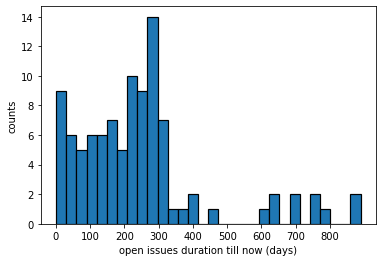

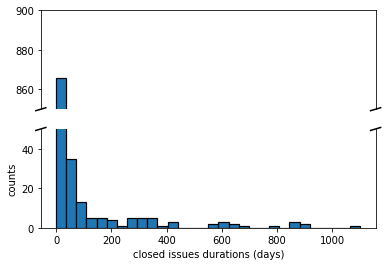

In [13]:
# open issues durations
plt.hist(open_durs, density=False, bins=30,  edgecolor='black', linewidth=1.2)  # density=False would make counts
plt.ylabel('counts')
plt.xlabel('open issues duration till now (days)')
plt.xticks(np.arange(0,max(open_durs.values), 100))
plt.savefig('durations_open_issues.png', bbox_inches='tight')
plt.show()

# closed issues durations
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.hist(closed_durs, edgecolor='black', linewidth=1.2, bins=30)
ax2.hist(closed_durs, edgecolor='black', linewidth=1.2, bins=30)
ax.set_ylim(850,900)  # outliers only
ax2.set_ylim(0,50) 

# plt.xticks(rotation=tilt,  horizontalalignment='right')
plt.xlabel('closed issues durations (days)')
plt.ylabel('counts')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False,  top=False)  
ax2.xaxis.tick_bottom()

d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.savefig('durations_closed_issues.png', bbox_inches='tight')
plt.show()

In [14]:
# how many issues closed less than 4 weeks
under30d = closed_durs[closed_durs.values <= 30].shape[0]/closed_durs.shape[0]
print('There are {} issues + open pull requests are closed less than 30 days!'.format(round(under30d,2)))

print('The average and median issues durations are {} and {} !'.format(round(closed_durs.mean(),2), closed_durs.median()))


There are 0.87 issues + open pull requests are closed less than 30 days!
The average and median issues durations are 27.08 and 0.0 !


In [15]:
closed_issues_df['durs'] = closed_durs
closed_issues_df[closed_issues_df['durs'] == 0]

,issue_no,created_at,closed_at,assignees_no,labels,closes_no,comments,content,author_association,comments_no,durs
1,1082,2021-11-26 03:33:05+00:00,2021-11-26 11:35:13+00:00,0,[good first issue],0,NaN,Upgrade to v6.0.0 errorMy current version is v...,NONE,3.0,0
3,1079,2021-11-24 09:16:35+00:00,2021-11-24 10:15:09+00:00,0,[],0,NaN,Rc0/v6.0.0<!-- < < < < < < < < < < < < < < < <...,MEMBER,1.0,0
4,1078,2021-11-24 08:54:25+00:00,2021-11-24 09:12:53+00:00,0,[],0,NaN,gaia: add NewSetUpContextDecorator to antedeco...,MEMBER,2.0,0
5,1077,2021-11-23 10:52:51+00:00,2021-11-24 08:33:55+00:00,0,[WIP],0,NaN,Vega 6.0.0<!-- < < < < < < < < < < < < < < < <...,MEMBER,1.0,0
6,1076,2021-11-22 17:23:33+00:00,2021-11-22 17:23:59+00:00,0,[],0,NaN,Update cosmos-hub-roadmap-2.0.mdZaki thinks li...,MEMBER,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
952,8,2019-05-20 13:33:49+00:00,2019-05-20 15:16:04+00:00,0,[R4R],0,NaN,Add Github Templatescloses #6 \r\n\r\nMost por...,MEMBER,0.0,0
953,7,2019-05-20 13:22:51+00:00,2019-05-20 15:16:38+00:00,3,"[T:bug, REST]",0,NaN,Rest Client Panic```\r\n$ gaiacli rest-server ...,MEMBER,1.0,0
954,6,2019-05-20 13:22:15+00:00,2019-05-20 15:16:04+00:00,0,[],0,NaN,Create Github Feature/Bug templatesCreate Gith...,MEMBER,0.0,0
955,5,2019-05-20 09:59:42+00:00,2019-05-20 19:27:36+00:00,0,"[R4R, docs]",0,NaN,Marko/Gaia Documentation FixesFixed documentat...,MEMBER,0.0,0


In [76]:
#1077
closed_issues_df[closed_issues_df['issue_no'] == 1071]

,issue_no,created_at,closed_at,assignees_no,labels,closes_no,comments,content,author_association,comments_no,durs
9,1071,2021-11-18 22:15:27+00:00,2021-11-18 23:30:29+00:00,0,[],0,NaN,Update interchain-security.md<!-- < < < < < < ...,MEMBER,0.0,0


In [16]:
closed_issues_df[closed_issues_df['durs'] >1000]

,issue_no,created_at,closed_at,assignees_no,labels,closes_no,comments,content,author_association,comments_no,durs
960,200,2018-11-16 17:30:33+00:00,2021-11-23 13:39:00+00:00,0,[tests],0,NaN,test unjail in CLI and LCD_Originally posted b...,MEMBER,3.0,1102


In [17]:
# def histgram_with_break(data, xlabel, ylabel, tilt, ax_y1, ax_y2, ax2_y1, ax2_y2):
#     f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
#     ax.hist(data, edgecolor='black', linewidth=1.2, bins=20)
#     ax2.hist(data, edgecolor='black', linewidth=1.2, bins=20)
#     ax.set_ylim(ax_y1,ax_y2)  # outliers only
#     ax2.set_ylim(ax2_y1,ax2_y2) 

#     plt.xticks(rotation=tilt,  horizontalalignment='right')
#     plt.ylabel(ylabel)
#     plt.xlabel(xlabel)
    
#     ax.spines['bottom'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax.xaxis.tick_top()
#     ax.tick_params(labeltop=False,  top = False)  
#     ax2.xaxis.tick_bottom()

#     d = .015 
#     kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
#     ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#     ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

#     kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
#     ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
#     ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


### issues labels

#### prepare data

In [18]:
labels_list = []
for i in range(issues_df.shape[0]):
    if len(issues_df.iloc[i]['labels'])==0:
        labels_list.append('not labeled')
    else:
        for label in issues_df.iloc[i]['labels']: 
            labels_list.append(label)


In [19]:
open_labels = [item for sublist in issues_df['labels'].tolist() for item in sublist]
close_labels = [item for sublist in closed_issues_df['labels'].tolist() for item in sublist]

In [20]:
open_unlabeled_count = issues_df['labels'].apply(lambda arr: len(arr) == 0).sum()
closed_unlabeled_count = closed_issues_df['labels'].apply(lambda arr: len(arr) == 0).sum()

# append all the lists in col of 'labels' into one list
open_labelsdf = pd.DataFrame({ 'labels': issues_df['labels'].sum() })
closed_labelsdf = pd.DataFrame({ 'labels': closed_issues_df['labels'].sum() })

open_freq = open_labelsdf['labels'].value_counts()
closed_freq = closed_labelsdf['labels'].value_counts()
open_freq['unlabeled'] = open_unlabeled_count
closed_freq['unlabeled'] = closed_unlabeled_count
open_freq.sort_values(ascending=False, inplace=True)
closed_freq.sort_values(ascending=False, inplace=True)

In [78]:
open_freq

unlabeled           60
docs                18
governance          11
enhancement          4
build                3
CLI                  3
good first issue     3
T:bug                3
more-info-needed     3
code-hygiene         2
WIP                  1
move-to-sdk          1
ADR                  1
devops               1
UX                   1
proposal             1
tests                1
blocked              1
Name: labels, dtype: int64

In [79]:
closed_freq

unlabeled                 594
R4R                       146
dependencies               90
docs                       48
automerge                  42
go                         35
stale                      20
build                      14
javascript                 14
backport/4.1.x             13
WIP                        11
sim                         9
CLI                         8
T:bug                       8
good first issue            7
more-info-needed            7
REST                        6
pinned                      6
backport/4.2.x              5
enhancement                 5
code-hygiene                4
conflicts                   4
proposal                    4
blocked                     4
tests                       3
security                    3
state-machine-breaking      3
IBC                         3
codefest                    2
help wanted                 2
UX                          1
roadmap                     1
governance                  1
devops    

#### plot data

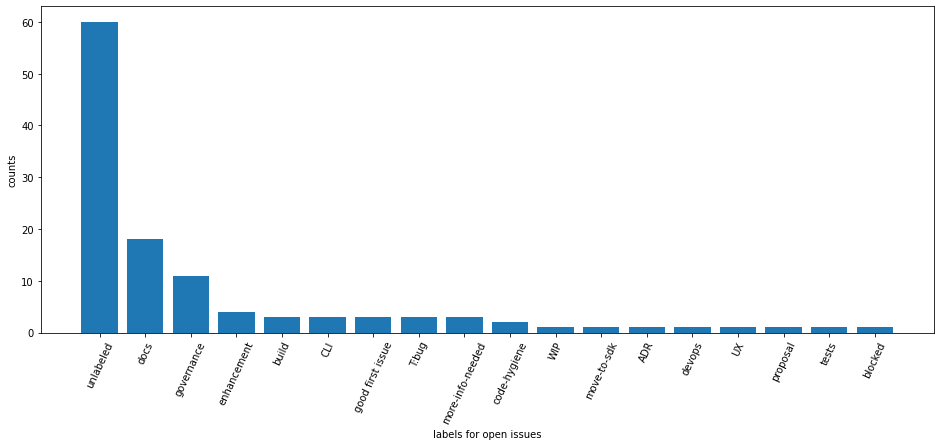

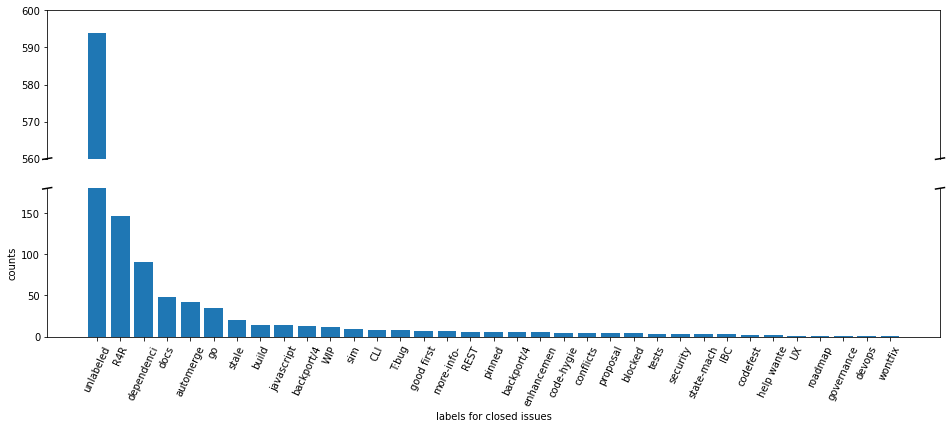

In [80]:
# labels plot for open issues
x = range(len(open_freq))
# height = counts
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(
    x=range(len(open_freq)), # 0, 1, 2, 3, 4,...
    height=open_freq.values, 
)
ax.set_xticks(range(len(open_freq)))
 # truncate the label name if too long
ax.set_xticklabels([ l for l in open_freq.index ], rotation=65)
ax.set_xlabel('labels for open issues')
ax.set_ylabel('counts')
plt.savefig('label_open_issues.png', bbox_inches='tight')
plt.show()




# labels plot for closed issues
x = range(len(closed_freq))
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(16,6))
ax.bar(
    x=range(len(closed_freq)),
    height=closed_freq.values, 
)
ax2.bar(
    x=range(len(closed_freq)),
    height=closed_freq.values, 
)

ax.set_ylim(560,600)  # outliers only
ax2.set_ylim(0,180) 
ax.set_xticks(range(len(closed_freq)))
ax2.set_xticks(range(len(closed_freq)))
ax.set_xticklabels([ l[:10] for l in closed_freq.index], rotation=65)
ax2.set_xticklabels([ l[:10] for l in closed_freq.index], rotation=65)
plt.xlabel('labels for closed issues')
plt.ylabel('counts')
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False,  top=False)  
ax2.xaxis.tick_bottom()

d = .005
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.savefig('label_closed_issues.png', bbox_inches='tight')
plt.show()


### contributor organizations

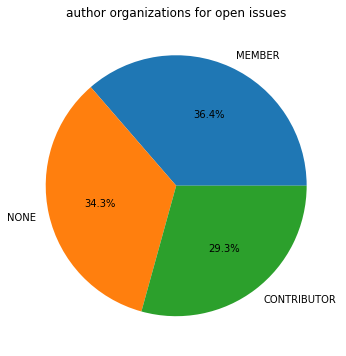

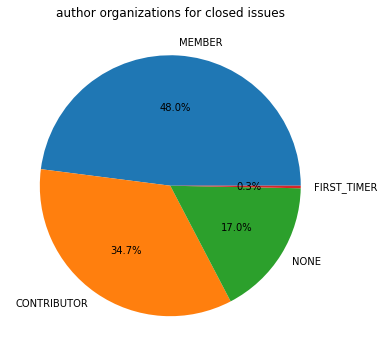

In [22]:
authors = issues_df['author_association'].value_counts()
authors.plot.pie(subplots=True, figsize=(12, 6),autopct='%1.1f%%')
plt.title('author organizations for open issues')
plt.ylabel('')
plt.savefig('authors_open_issues.png', bbox_inches='tight')
plt.show()

authors = closed_issues_df['author_association'].value_counts()
authors.plot.pie(subplots=True, figsize=(12, 6),autopct='%1.1f%%')
plt.title('author organizations for closed issues')
plt.ylabel('')
plt.savefig('authors_closed_issues.png', bbox_inches='tight')
plt.show()

### comments per issue

In [72]:
comments_counts = issues_df['comments_no'].value_counts()
comments1 = (comments_counts[1])/comments_counts.values.sum()
comments0or1 = (comments_counts[0]+comments_counts[1])/comments_counts.values.sum()
print('There are {} open issues has 1 comments, there are {} ipen issues has 0 and 1 comments'.format(closed_comments1, closed_comments0or1))

There are 0.09090909090909091 open issues has 1 comments, there are 0.8080808080808081 ipen issues has 0 and 1 comments


In [74]:
closed_comments_counts = closed_issues_df['comments_no'].value_counts()
closed_comments1 = (closed_comments_counts[1])/closed_comments_counts.values.sum()
closed_comments0or1 = (closed_comments_counts[0]+closed_comments_counts[1])/closed_comments_counts.values.sum()
print('There are {} closed issues has 1 comments, there are {} closed issues has 0 and 1 comments'.format(closed_comments1, closed_comments0or1))

There are 0.34994807892004154 closed issues has 1 comments, there are 0.6853582554517134 closed issues has 0 and 1 comments


In [77]:
closed_issues_df['comments_no'].value_counts()

1.0     337
0.0     323
2.0     121
3.0      50
4.0      49
5.0      25
6.0      17
7.0      10
8.0       7
9.0       6
10.0      4
15.0      3
14.0      3
11.0      2
18.0      1
22.0      1
13.0      1
12.0      1
25.0      1
41.0      1
Name: comments_no, dtype: int64

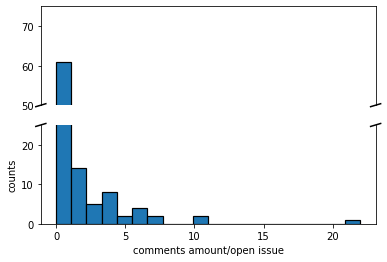

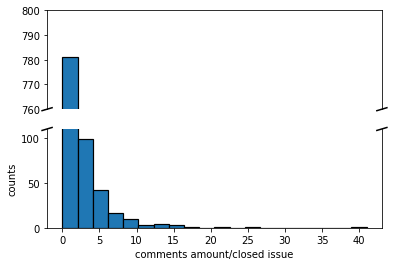

In [23]:
# open issues comment amount
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.hist(issues_df['comments_no'], edgecolor='black', linewidth=1.2, bins=20)
ax2.hist(issues_df['comments_no'], edgecolor='black', linewidth=1.2, bins=20)
ax.set_ylim(50,75)  # outliers only
ax2.set_ylim(0,25) 

# plt.xticks(rotation=tilt,  horizontalalignment='right')
plt.xlabel('comments amount/open issue')
plt.ylabel('counts')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False,  top=False)  
ax2.xaxis.tick_bottom()

d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.savefig('comments_open_issues.png', bbox_inches='tight')
plt.show()


# closed issues comment amount
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.hist(closed_issues_df['comments_no'], edgecolor='black', linewidth=1.2, bins=20)
ax2.hist(closed_issues_df['comments_no'], edgecolor='black', linewidth=1.2, bins=20)
ax.set_ylim(760,800)  # outliers only
ax2.set_ylim(0,110) 
plt.xticks(np.arange(0, max(closed_issues_df['comments_no'].values)+1, 5))
# plt.xticks(rotation=tilt,  horizontalalignment='right')
plt.xlabel('comments amount/closed issue')
plt.ylabel('counts')
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False,  top=False)  
ax2.xaxis.tick_bottom()

d = .015 
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.savefig('comments_closed_issues.png', bbox_inches='tight')
plt.show()

### keywords frequency check

In [24]:
words_dict_open = {}
words_dict_close = {}
words = ['panic', 'cosmovisor', 'version', 'peer', 'err', 'sync', 'how', 'tendermint', 'ibc', 'sdk']
for word in words:
    words_dict_open[word] = 0
    words_dict_close[word] = 0
    
for i in range(issues_df.shape[0]):
    find_keywords(issues_df.iloc[i]['content'].lower(), words, words_dict_open)


for i in range(closed_issues_df.shape[0]):
    find_keywords(closed_issues_df.iloc[i]['content'].lower(), words, words_dict_close)

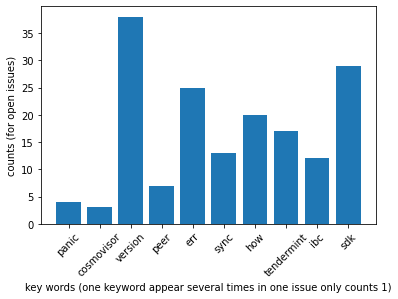

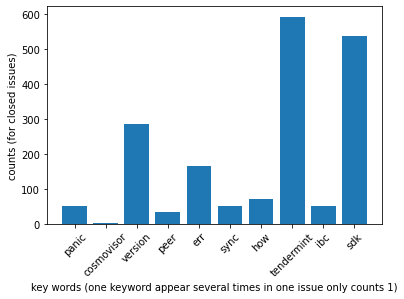

In [25]:
plt.bar(range(len(words_dict_open)), words_dict_open.values(), align='center', linewidth=1.2)
plt.xticks(range(len(words_dict_open)), list(words_dict_open.keys()))
plt.ylabel('counts (for open issues)')
plt.xlabel('key words (one keyword appear several times in one issue only counts 1)')
plt.xticks(rotation=45)
plt.savefig('keywords_ipen_issues.png', bbox_inches='tight')
plt.show()

plt.bar(range(len(words_dict_close)), words_dict_close.values(), align='center', linewidth=1.2)
plt.xticks(range(len(words_dict_close)), list(words_dict_close.keys()))
plt.ylabel('counts (for closed issues)')
plt.xlabel('key words (one keyword appear several times in one issue only counts 1)')
plt.xticks(rotation=45)
plt.savefig('keywords_closed_issues.png', bbox_inches='tight')
plt.show()